<p style="color: #000000; font-size: 16px; text-align: right; margin-bottom: 20px;"> María Carolina González Bernal
</p>
<p style="color: #000000; font-size: 28px; font-weight: bold; text-align: center; margin-top: 20px;">  Python básico IV 
</p>

### 1. Crea un modulo que podamos usar para obtener aleatoriamente notas entre 1 y 10. 

```python
# Creamos texto plano en la ruta de trabajo llamado "utilidades.py"
import random

# Función para generar número random
def dame_aleatorio(min, max):
    return random.randint(min, max)
```

In [27]:
# Importar el modulo "utilidades.py"
from modulos import utilidades

num = utilidades.dame_aleatorio(1,10)
print(num)

9


### 2. Utilizando el modulo anterior obtén 30 notas aleatorias у guardaras en Excel.

In [28]:
import openpyxl
from modulos import utilidades
from pathlib import Path

# Generar 30 notas aleatorias entre 1 y 10
lista_notas = [utilidades.dame_aleatorio(1, 10) for _ in range(30)]

# Crear archivo
excel_document = openpyxl.Workbook()
hoja = excel_document.active
hoja.title = "Notas"

# Agregar notas
for nota in lista_notas:
    hoja.append([nota])

ruta_excel = Path("/Users/carolina/MASTER/Programación_Python_básico/ejercicio_aleatorios.xlsx")
# Guardar archivo
excel_document.save(ruta_excel)

### 3. Crea un grafico que muestre si hay mas aprobados o suspensos.

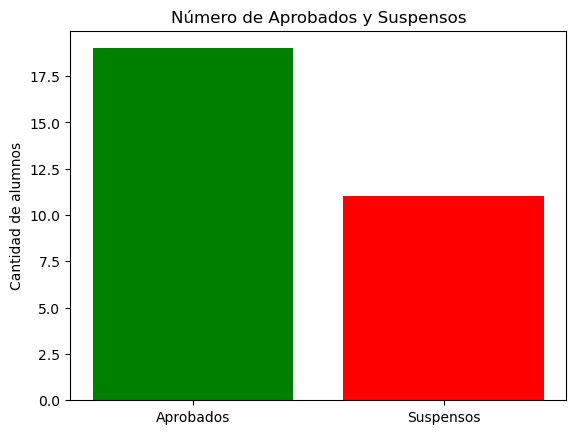

Hay 19 aprobados y 11 suspensos


In [34]:
import openpyxl
import matplotlib.pyplot as plt
from pathlib import Path

# Definir la ruta del archivo Excel
ruta_excel = Path("/Users/carolina/MASTER/Programación_Python_básico/ejercicio_aleatorios.xlsx")

# Abrir el archivo Excel
excel_document = openpyxl.load_workbook(ruta_excel)
hoja = excel_document['Notas']  # Selecciono la hoja de excel

# Leer valores de la columna A (todas las filas)
valores = hoja['A1':'A' + str(hoja.max_row)]

# Contar aprobados y suspensos
aprobados = 0
suspensos = 0

for fila in valores:  # recorro filas
    for nota in fila:  # recorro columnas
        if nota.value >= 5:
            aprobados += 1
        else:
            suspensos += 1


# Crear gráfico
x = ['Aprobados', 'Suspensos']
y = [aprobados, suspensos]

plt.bar(x, y, color=['green', 'red'])
plt.title('Número de Aprobados y Suspensos')
plt.ylabel('Cantidad de alumnos')
plt.show()
print('Hay ' + str(aprobados) + ' aprobados y ' + str(suspensos) + ' suspensos')